# Advertising Sales Channel Prediction

### Import Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../Datasets/Advertising.csv',header=0,names=['SNo','TV','Radio','Newspaper','Sales'])
df

,SNo,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Project Description 

The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. Need to predict the total sales generated from all the sales channel. Therefore, Sales is our target column and others are independent column. 

Since all the values are continuous, this is a regression problem.

In [3]:
df.shape

(200, 5)

Dataset has 200 rows and 5 columns

In [4]:
df.columns

Index(['SNo', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Column names in dataset

In [5]:
df.dtypes

SNo            int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

All columns are continuous in nature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here, we get the information regarding dataset i.e. RangeIndex,Dtype,Non-null count

### EDA and Visualisations

In [7]:
#Checking null values
df.isnull().sum()

SNo          0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

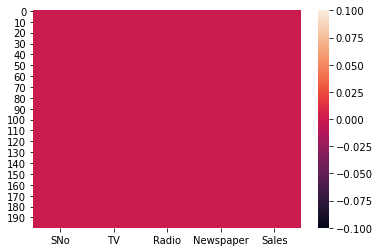

In [8]:
#Heatmap for null values
sns.heatmap(df.isnull())

In [9]:
# Describe dataset
df.describe()

,SNo,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


All the columns have high standard deviation except target column. Difference in 75% and max is high in Newspaper hence Outliers exists. A little skewness is present in the dataset. TV is left skewed (mean<median). Radio, Newspaper & Sales are right skewed (mean>median).

In [10]:
#Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [11]:
#Checking value in z having greater than 3 value
z[16]

array([1.4462805 , 0.92530498, 0.9004942 , 3.84117072, 0.29254112])

SNo             AxesSubplot(0.125,0.125;0.133621x0.755)
TV           AxesSubplot(0.285345,0.125;0.133621x0.755)
Radio         AxesSubplot(0.44569,0.125;0.133621x0.755)
Newspaper    AxesSubplot(0.606034,0.125;0.133621x0.755)
Sales        AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

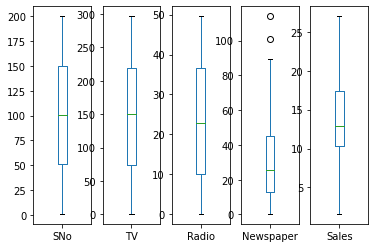

In [12]:
#Plotting outliers
df.plot(kind='box',subplots=True)

A few outliers are present in the dataset

In [13]:
#Checking skewness
df.skew()

SNo          0.000000
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

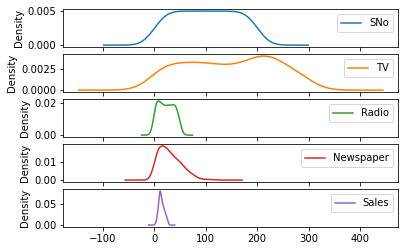

In [14]:
df.plot(kind='kde',subplots=True)

Skewness is present in the dataset

In [15]:
# Checking correlation
df.corr()

,SNo,TV,Radio,Newspaper,Sales
SNo,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

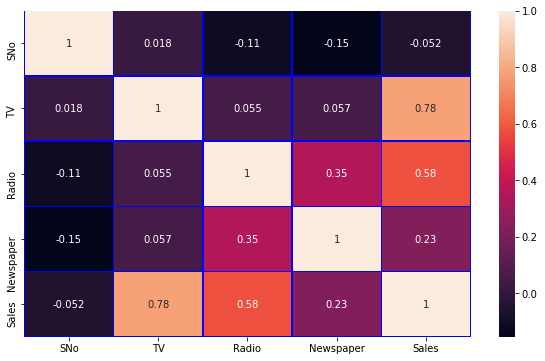

In [16]:
# Plotting correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='b')

Tv, Radio are strongly correlated with target column Sales. Newspaper has a good correlation with target. Radio and Newspaper has good correlation. Multicollinearity might exists.

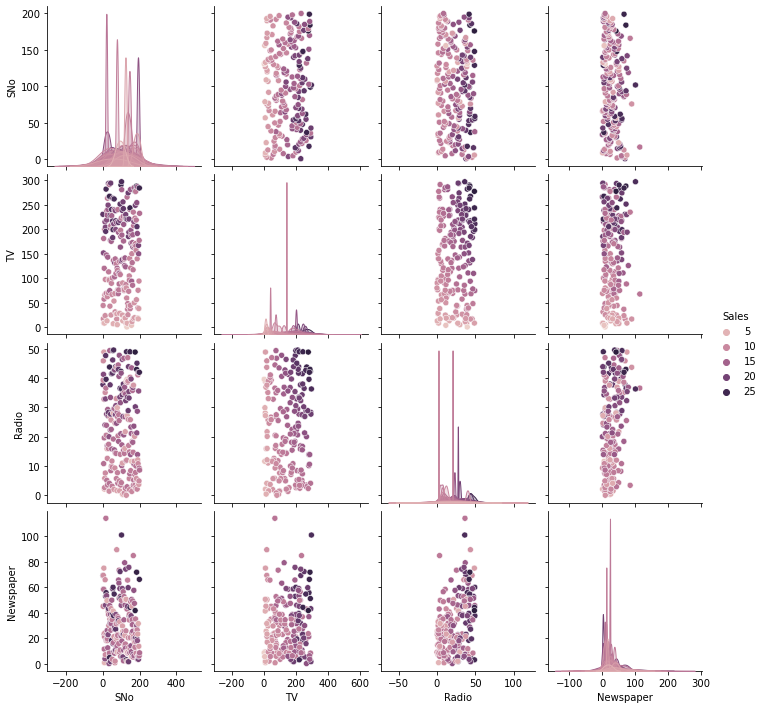

In [83]:
#Pairplot
sns.pairplot(df,hue='Sales')

We can see there are so much of overlapping of data in the plot.

In [17]:
# Since Sno is not required to be fed to the model we can drop the column
df1=df.drop('SNo',axis=1)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Data Cleaning

In [18]:
# Removing outliers
df1=df1[(z<3).all(axis=1)]
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [19]:
# Percentage Data Loss
loss_percent=(200-198)/200 * 100
loss_percent

1.0

Just 1% data is lost after removing skewness.

In [20]:
# Checking skewness after removing outliers
df1.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

In [52]:
#Removing skewness
df2=df1.copy()
df2['Newspaper']=np.log(df2['Newspaper'])

In [53]:
df2.skew()

TV          -0.082332
Radio        0.114842
Newspaper   -1.221802
Sales        0.407130
dtype: float64

In [54]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
power=pt.fit_transform(df2)
df2=pd.DataFrame(power,columns=df2.columns)
df2

,TV,Radio,Newspaper,Sales
0,0.955983,0.969110,1.523264,1.476664
1,-1.192003,1.046234,0.840679,-0.645180
2,-1.646125,1.372968,1.525697,-0.889458
3,0.142934,1.147332,1.246318,0.892431
4,0.456452,-0.735026,1.243558,-0.127879
...,...,...,...,...
193,-1.288311,-1.423941,-0.661093,-1.292322
194,-0.521579,-1.287689,-1.161438,-0.799286
195,0.416577,-0.862474,-1.349915,-0.147694
196,1.467535,1.182269,1.449037,1.990554


In [55]:
df2.skew()

TV          -0.320682
Radio       -0.236668
Newspaper   -0.258348
Sales       -0.007573
dtype: float64

 Skewness is removed from the columns. +/-0.5 is the acceptable range of skewness.

### Separating the columns into x and y

In [56]:
x=df2.iloc[:,:3]
x

,TV,Radio,Newspaper
0,0.955983,0.969110,1.523264
1,-1.192003,1.046234,0.840679
2,-1.646125,1.372968,1.525697
3,0.142934,1.147332,1.246318
4,0.456452,-0.735026,1.243558
...,...,...,...
193,-1.288311,-1.423941,-0.661093
194,-0.521579,-1.287689,-1.161438
195,0.416577,-0.862474,-1.349915
196,1.467535,1.182269,1.449037


In [57]:
y=df2.iloc[:,-1]
y

0      1.476664
1     -0.645180
2     -0.889458
3      0.892431
4     -0.127879
         ...   
193   -1.292322
194   -0.799286
195   -0.147694
196    1.990554
197   -0.029786
Name: Sales, Length: 198, dtype: float64

In [58]:
df2.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Multicollinearity with VIF

In [59]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,TV,1.002623
1,Radio,1.080260
2,Newspaper,1.079351


There is no multicollinearity present.

### Scaling : Standard Scaler / Min-Max Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)

Independent variables are scaled/standardized.

### Find best randon state for Train-Test Split

In [62]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [79]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain,' Accuracy(Testing) : ',maxAcc)

Best random state :  42  Accuracy(Training) :  90.55541784901132  Accuracy(Testing) :  90.7173945850805
Best random state :  46  Accuracy(Training) :  90.55138118226938  Accuracy(Testing) :  90.77789844139616
Best random state :  63  Accuracy(Training) :  90.50457130521235  Accuracy(Testing) :  90.9551187692
Final Best random state :  24  Accuracy(Training) :  0.8960389149396634  Accuracy(Testing) :  0.9564165748016528


Here, training & testing accuracies are almost same for all random states selected. So, lets take 46 as our best random state.

In [80]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=46)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


### Finding the best algorithm

In [81]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [82]:
# Making instance of regressors
lr=LinearRegression()
knn=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()

In [83]:
#Executing all algorithms in a single for loop

algo_list=[lr,knn,svr,rf]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svr :
        for j in svr_kernel :
            svr=SVR(kernel=j)
            svr.fit(x_train,y_train)
            pred=svr.predict(x_test)
            acc=r2_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svr1=SVR(kernel=j)
        print(svr1)
        svr1.fit(x_train,y_train)
        predtrain=svr1.predict(x_train)
        predtest=svr1.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  90.55138118226938  Accuracy(Test)  90.77789844139616
mean_absolute_error 0.23960577179525616
mean_squared_error 0.09119131479490356


KNeighborsRegressor()
Accuracy(Training) :  94.58990583277001  Accuracy(Test)  88.43745987353803
mean_absolute_error 0.19927356269061688
mean_squared_error 0.1143343770181302


SVR(kernel='linear')
Accuracy(Training) :  90.1215075694328  Accuracy(Test)  90.52156896823773
mean_absolute_error 0.23460845238961842
mean_squared_error 0.09372598886344


RandomForestRegressor()
Accuracy(Training) :  99.4835239501212  Accuracy(Test)  97.17684191896241
mean_absolute_error 0.13275238752953364
mean_squared_error 0.02791635893919293




RandomForestRegressor() has the highest accuracy and least error.

### Cross Validation

In [84]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x1,y,cv=5).mean())

CV mean of  LinearRegression()  is  0.8986531934898426
CV mean of  KNeighborsRegressor()  is  0.924535410998541
CV mean of  SVR()  is  0.9566503059828377
CV mean of  RandomForestRegressor()  is  0.9683335033032767


RandomForestRegressor() has the least difference in accuracy and Cross validation mean. So, lets select RandomForestRegressor() as the best algorithm.

### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse', 'mae','poisson'],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 9}

Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues.

In [87]:
rf=RandomForestRegressor(criterion='mae', max_features='auto', max_depth=None, n_estimators=10)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(rf,x1,y,cv=5).mean()

print('R2_score : ',acc,' CV mean : ',cv)

R2_score :  0.9549337573459835  CV mean :  0.9659053612813404


Executed the selected model with hyper tuned parameters for better accuracy.

We are getting model accuracy as 98% which shows our model is performing good.

### AUC-ROC Curve

For random forest ROC AUC is not available, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [88]:
# Saved the model in .pkl file
import pickle
file='Advertising.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [89]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.9549337573459835

In [90]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(40, 3)
(40,)


In [91]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[20:50]

,Orignal,Predicted
20,-0.127879,-0.142430
21,-0.370242,-0.397636
22,1.042898,0.976819
23,0.085855,-0.084566
24,-0.516565,-0.460911
25,-1.027835,-1.371868
26,0.438521,0.312237
27,-1.392372,-1.428507
28,-0.329130,-0.233372
29,1.334836,1.395824
